***Iterative Deepening Depth-First Search (IDDFS)***

* Iterative deepening adds to DFS, that the algorithm not only returns one layer up the tree when the node has no more children to visit, but also when a previously specified maximum depth has been reached. Also, if we return to the start node, we increase the maximum depth and start the search all over, until we’ve visited all leaf nodes (bottom nodes) and increasing the maximum depth won’t lead to us visiting more nodes.

* Specifically, these are the steps:
* 1. For each child of the current node
* 2. If it is the target node, return
* 3. If the current maximum depth is reached, return
* 4. Set the current node to this node and go back to 1.
* 5. After having gone through all children, go to the next child of the parent (the next sibling)
* 6. After having gone through all children of the start node, increase the maximum depth and go back to 1.
* 7. If we have reached all leaf (bottom) nodes, the goal node doesn’t exist.

The Node class is used to represent a node in the graph.

In [ ]:
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state      # Stores the name of the node (e.g., 'A', 'B', etc.)
        self.parent = parent    # Stores the parent node (used for backtracking the path)
        self.actions = actions  # Stores the list of neighboring nodes (connected nodes)
        self.totalcost = totalcost  # Not used in this BFS implementation

In [ ]:
# he key in the dictionary (graph) represents the name (label) of the node.
graph = {'A': Node('A',None, ['B', 'C', 'E'], None),
         'B': Node('B',None, ['A', 'D', 'E'], None),
         'C': Node('C',None, ['A', 'F', 'G'], None),
         'D': Node('D',None, ['B', 'E'], None),
         'E': Node('E',None, ['A', 'B', 'D'], None),
         'F': Node('F',None, ['C'], None),
         'G': Node('G',None, ['C'], None)}

In [ ]:
# Function to generate the path from the start state to the goal state
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start with the goal state
    currentparent = graph[goalstate].parent  # Get the parent of the goal state
    while currentparent is not None:  # Keep going until we reach the start state
        solution.append(currentparent.state)  # Add the parent's state to the solution path
        currentparent = graph[currentparent.state].parent  # Move to the next parent
    solution.reverse()  # Reverse the path to get it from start to goal
    return solution

In [ ]:
# Depth-Limited Search (DLS) function
def DLS(graph, node, goalstate, depth_limit, visited):
    # If the depth limit is reached, stop exploring further
    if depth_limit == 0:
        return None

    # If the goal state is found, return the node
    if node.state == goalstate:
        return node

    # Mark the current node as visited
    visited.add(node.state)

    # Explore all child nodes (neighbors)
    for child in node.actions:
        if child not in visited:  # Avoid revisiting nodes in the current path
            graph[child].parent = node  # Set the parent of the child node
            # Recursively call DLS with reduced depth limit
            result = DLS(graph, graph[child], goalstate, depth_limit - 1, visited.copy())
            if result is not None:  # If the goal is found, return the result
                return result

    return None  # Goal not found within the depth limit


In [ ]:
# Iterative Deepening DFS function
def IDDFS():
    initialstate = 'A'
    goalstate = 'F'

    # Define the graph
    graph = {
        'A': Node('A', None, ['B', 'C', 'E'], None),
        'B': Node('B', None, ['A', 'D', 'E'], None),
        'C': Node('C', None, ['A', 'F', 'G'], None),
        'D': Node('D', None, ['B', 'E'], None),
        'E': Node('E', None, ['A', 'B', 'D'], None),
        'F': Node('F', None, ['C'], None),
        'G': Node('G', None, ['C'], None)
    }

    depth_limit = 0  # Start with depth limit 0
    while True:  # Keep increasing the depth limit until the goal is found
        # Call DLS with the current depth limit and an empty visited set
        result = DLS(graph, graph[initialstate], goalstate, depth_limit, set())
        if result is not None:  # If the goal is found, return the path
            return actionsequence(graph, initialstate, goalstate)
        depth_limit += 1  # Increase the depth limit for the next iteration

        # Stop if the depth limit exceeds the maximum possible depth
        if depth_limit > len(graph):
            break

    return None  # Goal not found

In [ ]:
# Call the IDDFS function to find the path from 'A' to 'F'
solution = IDDFS()
print("Path from A to F:", solution)

*Activity 1:*
* Imagine going from Arad to Bucharest in the map (given in manual). Implement a IDDFS to find the corresponding path.

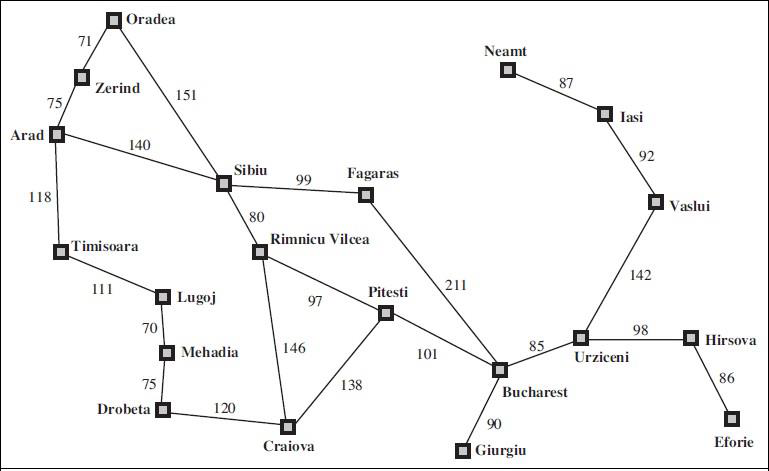

In [ ]:
# Iterative Deepening DFS function
def IDDFS():
    initialstate = 'Arad'  # Start state
    goalstate = 'Bucharest'  # Goal state

    # Graph representation of Romania map
    graph = {
        'Arad': Node('Arad', None, ['Zerind', 'Timisoara', 'Sibiu'], None),
        'Zerind': Node('Zerind', None, ['Arad', 'Oradea'], None),
        'Oradea': Node('Oradea', None, ['Zerind', 'Sibiu'], None),
        'Timisoara': Node('Timisoara', None, ['Arad', 'Lugoj'], None),
        'Lugoj': Node('Lugoj', None, ['Timisoara', 'Mehadia'], None),
        'Mehadia': Node('Mehadia', None, ['Lugoj', 'Drobeta'], None),
        'Drobeta': Node('Drobeta', None, ['Mehadia', 'Craiova'], None),
        'Craiova': Node('Craiova', None, ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'], None),
        'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, ['Sibiu', 'Craiova', 'Pitesti'], None),
        'Sibiu': Node('Sibiu', None, ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'], None),
        'Fagaras': Node('Fagaras', None, ['Sibiu', 'Bucharest'], None),
        'Pitesti': Node('Pitesti', None, ['Rimnicu Vilcea', 'Craiova', 'Bucharest'], None),
        'Bucharest': Node('Bucharest', None, ['Fagaras', 'Pitesti', 'Urziceni', 'Giurgiu'], None),
        'Giurgiu': Node('Giurgiu', None, ['Bucharest'], None),
        'Urziceni': Node('Urziceni', None, ['Bucharest', 'Vaslui', 'Hirsova'], None),
        'Vaslui': Node('Vaslui', None, ['Urziceni', 'Iasi'], None),
        'Iasi': Node('Iasi', None, ['Vaslui', 'Neamt'], None),
        'Neamt': Node('Neamt', None, ['Iasi'], None),
        'Hirsova': Node('Hirsova', None, ['Urziceni', 'Eforie'], None),
        'Eforie': Node('Eforie', None, ['Hirsova'], None)
    }

    depth_limit = 0  # Start with depth limit 0
    while True:  # Keep increasing the depth limit until the goal is found
        # Call DLS with the current depth limit and an empty visited set
        result = DLS(graph, graph[initialstate], goalstate, depth_limit, set())
        if result is not None:  # If the goal is found, return the path
            return actionsequence(graph, initialstate, goalstate)
        depth_limit += 1  # Increase the depth limit for the next iteration

        # Stop if the depth limit exceeds the maximum possible depth
        if depth_limit > len(graph):
            break

    return None  # Goal not found


# Call the IDDFS function to find the path from 'Arad' to 'Bucharest'
solution = IDDFS()
print("Path from Arad to Bucharest:", solution)

*Task 2:*
* Generate a list of possible words from a character matrix
Given an M × N boggle board, find a list of all possible words that can be formed by a sequence of adjacent characters on the board.
We are allowed to search a word in all eight possible directions, i.e., North, West, South, East, North-East, North-West, South-East, South-West, but a word should not have multiple instances of the same cell.
Consider the following the traditional 4 × 4 boggle board. If the input dictionary is [START, NOTE, SAND, STONED], the valid words are [NOTE, SAND, STONED]. With iterative deepening, create words of length 5, 6, 7 and 8 through each iteration.

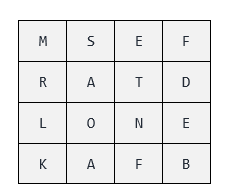

In [ ]:
# Class definition for a Node
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state  # Represents the position (row, col) of a letter on the board
        self.parent = parent  # Stores the parent node to track the path of traversal
        self.actions = actions  # Not used in this case, but could store possible moves
        self.totalcost = totalcost  # Not used in this problem but kept for structure


# Function to find words in a Boggle board using IDDFS
def IDDFS(board, dictionary):
    # Define all 8 possible movement directions (N, S, E, W, NE, NW, SE, SW)
    directions = [(-1, -1), (-1, 0), (-1, 1),  # North-West, North, North-East
                  (0, -1),          (0, 1),   # West,       East
                  (1, -1),  (1, 0), (1, 1)]   # South-West, South, South-East

    rows = len(board)  # Number of rows in the board
    cols = len(board[0])  # Number of columns in the board
    valid_words = set()  # Set to store valid words found in the dictionary

    # Helper function to perform Depth-Limited Search (DLS) from a given cell
    def DLS(node, current_word, visited, depth_limit):
        # If the depth limit is reached, stop exploring further
        if depth_limit == 0:
            return

        # Add the character at the current cell to the word being formed
        current_word += board[node.state[0]][node.state[1]]
        visited.add(node.state)  # Mark this cell as visited

        # If the formed word exists in the dictionary, store it
        if current_word in dictionary:
            valid_words.add(current_word)

        # Explore all 8 possible directions recursively
        for direction in directions:
            new_row = node.state[0] + direction[0]  # Calculate new row index
            new_col = node.state[1] + direction[1]  # Calculate new column index

            # Check if the new position is within the board and not visited yet
            if 0 <= new_row < rows and 0 <= new_col < cols and (new_row, new_col) not in visited:
                new_node = Node((new_row, new_col), node, [], None)  # Create a new node
                DLS(new_node, current_word, visited.copy(), depth_limit - 1)  # Recursive DLS call

    # Perform IDDFS with increasing depth limits (5, 6, 7, 8)
    for depth_limit in range(5, 9):  # Words of length 5, 6, 7, 8
        # Iterate through each cell in the board as a starting point for DLS
        for i in range(rows):
            for j in range(cols):
                start_node = Node((i, j), None, [], None)  # Create a starting node
                DLS(start_node, "", set(), depth_limit)  # Start DLS from this position with the current depth limit

    return list(valid_words)  # Return the found words as a list


# Define the Boggle board
board = [
    ['S', 'T', 'N', 'G'],
    ['O', 'A', 'E', 'S'],
    ['D', 'N', 'O', 'T'],
    ['S', 'E', 'D', 'M']
]

# Define the dictionary containing valid words
dictionary = ["START", "NOTE", "SAND", "STONED"]

# Find all valid words from the board
valid_words = IDDFS(board, dictionary)
print("Valid words:", valid_words)  # Output the found words

In [ ]:
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state  # Represents the current cell (row, col)
        self.parent = parent  # Parent node to track the path
        self.actions = actions  # Not used in this problem
        self.totalcost = totalcost  # Not used in this problem

# Depth-Limited Search (DLS) function
def DLS(board, node, depth_limit, current_word, visited, dictionary, valid_words):
    # If the depth limit is reached, stop exploring further
    if depth_limit == 0:
        return

    # Add the current cell's character to the word being formed
    current_word += board[node.state[0]][node.state[1]]

    # If the current word is in the dictionary, add it to valid_words
    if current_word in dictionary:
        valid_words.add(current_word)

    # Mark the current cell as visited
    visited.add(node.state)

    # Explore all 8 possible directions
    for direction in directions:
        new_row = node.state[0] + direction[0]
        new_col = node.state[1] + direction[1]

        # Check if the new cell is within bounds and not visited
        if 0 <= new_row < len(board) and 0 <= new_col < len(board[0]) and (new_row, new_col) not in visited:
            # Create a new node for the new cell
            new_node = Node((new_row, new_col), node, [], None)
            # Recursively call DLS with reduced depth limit
            DLS(board, new_node, depth_limit - 1, current_word, visited.copy(), dictionary, valid_words)


# Iterative Deepening DFS function
def IDDFS(board, dictionary):
    rows = len(board)
    cols = len(board[0])
    valid_words = set()  # To store valid words found in the dictionary

    # Perform IDDFS with increasing depth limits (5, 6, 7, 8)
    for depth_limit in range(5, 9):  # Words of length 5, 6, 7, 8
        # Iterate over each cell in the board to start DLS from that cell
        for i in range(rows):
            for j in range(cols):
                # Create a starting node for the current cell
                start_node = Node((i, j), None, [], None)
                # Call the DLS function to start DFS from this cell with the current depth limit
                DLS(board, start_node, depth_limit, "", set(), dictionary, valid_words)

    return list(valid_words)


# Directions for 8 possible movements
directions = [(-1, -1), (-1, 0), (-1, 1),  # North-West, North, North-East
              (0, -1),          (0, 1),   # West,       East
              (1, -1),  (1, 0), (1, 1)]   # South-West, South, South-East

# Input Boggle board
board = [
    ['S', 'T', 'N', 'G'],
    ['O', 'A', 'E', 'S'],
    ['D', 'N', 'O', 'T'],
    ['S', 'E', 'D', 'M']
]

# Input dictionary of valid words
dictionary = ["START", "NOTE", "SAND", "STONED"]

# Call the IDDFS function to find valid words in the board
valid_words = IDDFS(board, dictionary)
print("Valid words:", valid_words)